In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df=df.drop(["Date"], axis=1)

In [8]:
y= df["Weekly_Sales"]
X=  df.drop(["Weekly_Sales"], axis=1)

In [9]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106


In [10]:
#Разделение
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.67, random_state=40)

In [11]:
#Линейная регрессия
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
sc = lr.score(X_train, y_train)
print('coefficient of determination:', sc)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.14481416065354735
intercept: 1953076.6645984962
slope: [-15691.76563718 102482.25476426   -733.77389842  22586.35674671
  -2340.04885751 -23679.94499012]


In [12]:
y_lr = lr.predict(X_test)

In [13]:
y_lr

array([1206318.98460254, 1275776.08094236, 1128468.8500734 , ...,
       1047921.08289579,  965064.08294646, 1455605.64517101])

In [14]:
#SVM
from sklearn import svm
s = svm.SVR()
s.fit(X_train, y_train)

SVR()

In [15]:
y_svr = s.predict(X_test)

In [16]:
y_svr

array([957276.53982528, 957313.66377709, 957268.85547593, ...,
       957301.40701618, 957299.9368995 , 957321.9519462 ])

In [17]:
#Дерево решений
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [18]:
y_dt = dt.predict(X_test)

In [19]:
y_dt

array([ 480239.88,  981210.57,  570045.79, ..., 1949983.93, 1037687.07,
       2771646.81])

## Оценка качества

In [20]:
# sqrt mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Линейная регрессия: ", sqrt(mean_squared_error(y_test, y_lr)))
print("SVM: ", sqrt(mean_squared_error(y_test, y_svr)))
print("Дерево решений: ", sqrt(mean_squared_error(y_test, y_dt)))

Линейная регрессия:  522499.82680037897
SVM:  570384.3452919339
Дерево решений:  196199.12489723408


In [21]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
print("Линейная регрессия: ", mean_absolute_error(y_test, y_lr))
print("SVM: ", mean_absolute_error(y_test, y_svr))
print("Дерево решений: ", mean_absolute_error(y_test, y_dt))

Линейная регрессия:  428434.40595507564
SVM:  461887.7009799552
Дерево решений:  101961.1894364564


In [22]:
# r2_score
from sklearn.metrics import r2_score
print("Линейная регрессия: ", r2_score(y_test, y_lr))
print("SVM: ", r2_score(y_test, y_svr))
print("Дерево решений: ", r2_score(y_test, y_dt))

Линейная регрессия:  0.13906871593775405
SVM:  -0.025962252629736504
Дерево решений:  0.8786079293245946


In [23]:
# Важность признаков
list(zip(X_train.columns.values, dt.feature_importances_))

[('Store', 0.6392863376762198),
 ('Holiday_Flag', 0.003929304597391797),
 ('Temperature', 0.026852232058708427),
 ('Fuel_Price', 0.016186074109481856),
 ('CPI', 0.17663712441819),
 ('Unemployment', 0.13710892714000816)]

In [24]:
sum(dt.feature_importances_)

1.0

In [25]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

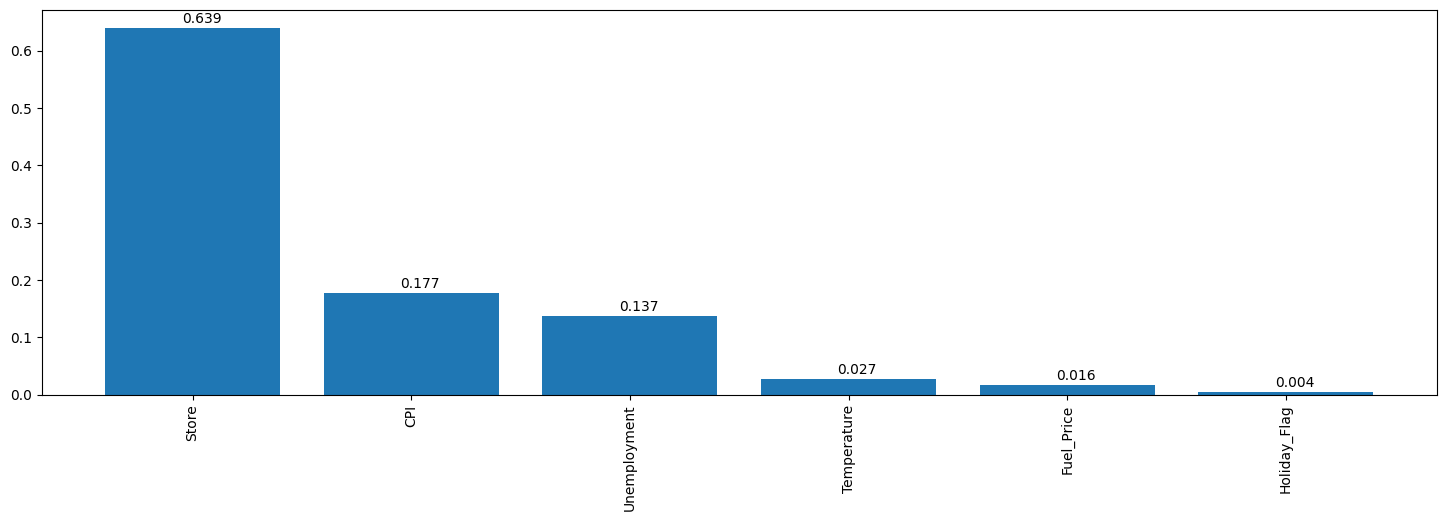

In [26]:
dt_fl, dt_fd = draw_feature_importances(dt, X_train)

In [27]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

[Text(0.5, 0.8333333333333334, 'x[0] <= 28.5\nsquared_error = 321204476313.002\nsamples = 2123\nvalue = 1044776.737'),
 Text(0.25, 0.5, 'x[4] <= 189.354\nsquared_error = 337671453944.155\nsamples = 1332\nvalue = 1218183.851'),
 Text(0.125, 0.16666666666666666, 'squared_error = 243522238672.622\nsamples = 689\nvalue = 1397182.352'),
 Text(0.375, 0.16666666666666666, 'squared_error = 367434673068.981\nsamples = 643\nvalue = 1026379.858'),
 Text(0.75, 0.5, 'x[4] <= 131.711\nsquared_error = 157570114820.172\nsamples = 791\nvalue = 752768.802'),
 Text(0.625, 0.16666666666666666, 'squared_error = 66888068473.239\nsamples = 238\nvalue = 480971.601'),
 Text(0.875, 0.16666666666666666, 'squared_error = 151120691616.048\nsamples = 553\nvalue = 869744.813')]

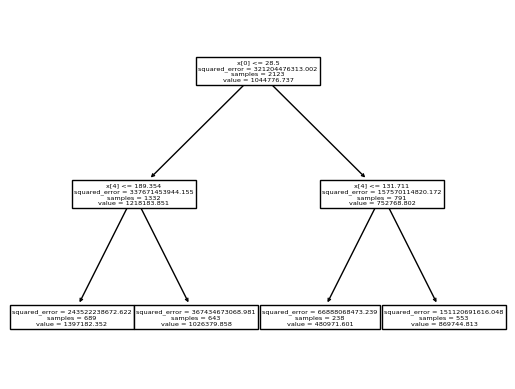

In [28]:
from sklearn import tree
dt_new = DecisionTreeRegressor(random_state=0, max_depth=2)
dt_new.fit(X_train, y_train)
tree.plot_tree(dt_new) 